In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from trade.datamanager.utils.model import LoadRequest, _load_model_data_timeseries, DivType, VolatilityModel, OptionPricingModel
from trade.datamanager.vars import LOADED_NAMES
from trade.optionlib.greeks.numerical.binomial import binomial_tree_greeks
from trade.datamanager.utils.date import sync_date_index
from trade.datamanager import DividendDataManager
from trade.optionlib.assets.dividend import get_vectorized_dividend_scehdule, get_div_histories
LOADED_NAMES


/Users/chiemelienwanisobi/miniconda3/envs/openbb_new_use/lib/python3.11/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


2026-01-26 16:36:23 trade.helpers.Logging INFO: Logging Root Directory: /Users/chiemelienwanisobi/cloned_repos/QuantTools/logs
2026-01-26 16:36:23 [test] trade.helpers.clear_cache INFO: No expired caches to delete on 2026-01-26.
2026-01-26 16:36:27 [test] dbase.DataAPI.ThetaData.proxy INFO: Refreshed proxy URL: http://54.205.248.219:5500/thetadata
2026-01-26 16:36:27 [test] dbase.DataAPI.ThetaData.proxy INFO: Using Proxy URL: http://54.205.248.219:5500/thetadata
2026-01-26 16:36:27 [test] dbase.DataAPI.ThetaData INFO: Using V2 of the ThetaData API


Scheduled Data Requests will be saved to: /Users/chiemelienwanisobi/cloned_repos/QuantTools/module_test/raw_code/DataManagers/scheduler/requests.jsonl
2026-01-26 16:36:29 [test] DataManager.py CRITICAL: Using ProcessSaveManager for saving data.
Fetching rates data from yfinance directly during market hours
YF.download() has changed argument auto_adjust default to True


set()

In [2]:
get_div_histories(tickers=["BA"])

{'BA':                    amount
 ex_dividend_date         
 1962-02-05        0.00823
 1962-05-08        0.00823
 1962-08-13        0.00823
 1962-11-05        0.00823
 1963-02-06        0.00823
 ...                   ...
 2019-02-07        2.05500
 2019-05-09        2.05500
 2019-08-08        2.05500
 2019-11-07        2.05500
 2020-02-13        2.05500
 
 [228 rows x 1 columns]}

In [3]:
res = get_vectorized_dividend_scehdule(
    tickers=["BA"], start_dates=["2025-01-01"], end_dates=["2026-01-23"], method=DividendDataManager.CONFIG.default_forecast_method.value
)
res

2026-01-26 16:36:35 [test] trade.optionlib.assets.dividend INFO: Using dual projection method for ticker BA


[<Schedule: 0 dividends>]

In [4]:
tuple(res[-1])

()

In [5]:
symbol = "BA"
expiration = "2026-08-21"
right = "C"
strike = 270.0
ts_start = "2025-01-01"
ts_end = "2026-01-23"


In [6]:
dm = DividendDataManager("BA")
del dm.cache[
    "symbol:BA|interval:na|artifact_type:divs|series_id:hist|current_state:SCHEDULE|lookback_years:1|method:CONSTANT|vendor:YFINANCE"
]
dm.get_discrete_dividend_schedule(
    end_date=ts_end,
    start_date=ts_start,
)

2026-01-26 16:36:38 [test] trade.optionlib.assets.dividend INFO: Using dual projection method for ticker BA


([],
 'symbol:BA|interval:na|artifact_type:divs|series_id:hist|current_state:SCHEDULE|lookback_years:1|method:CONSTANT|vendor:YFINANCE')

In [7]:
LoadRequest?

Init signature:
LoadRequest(
    symbol: str,
    start_date: Union[str, pandas._libs.tslibs.timestamps.Timestamp],
    end_date: Union[str, pandas._libs.tslibs.timestamps.Timestamp],
    expiration: Union[str, pandas._libs.tslibs.timestamps.Timestamp],
    strike: Optional[float] = None,
    right: Optional[str] = None,
    series_id: Optional[trade.datamanager._enums.SeriesId] = None,
    dividend_type: Optional[trade.optionlib.config.types.DivType] = None,
    endpoint_source: Optional[trade.datamanager._enums.OptionSpotEndpointSource] = None,
    vol_model: Optional[trade.datamanager._enums.VolatilityModel] = None,
    market_model: Optional[trade.datamanager._enums.OptionPricingModel] = None,
    load_spot: bool = True,
    load_forward: bool = True,
    load_dividend: bool = True,
    load_rates: bool = True,
    load_option_spot: bool = False,
    load_vol: bool = True,
    undo_adjust: bool = True,
) -> None
Docstring:      LoadRequest(symbol: str, start_date: Union[str, pandas

In [8]:
request = LoadRequest(
    symbol=symbol,
    start_date=ts_start,
    end_date=ts_end,
    expiration=expiration,
    right=right,
    strike=strike,
    dividend_type=DivType.DISCRETE,
    load_spot = True,
    load_forward=True,
    load_vol=True,
    load_dividend=True,
    load_rates=True,
    load_option_spot=True,
    vol_model=VolatilityModel.MARKET,
    market_model=OptionPricingModel.BSM
)
packet = _load_model_data_timeseries(request)
    

2026-01-26 16:36:38 [test] trade.datamanager.dividend INFO: Using provided dividend_type: DivType.DISCRETE
2026-01-26 16:36:38 [test] trade.datamanager.dividend INFO: Fetching discrete dividend schedule timeseries for BA from 2025-01-01 00:00:00 to 2026-01-23 00:00:00 with maturity 2026-08-21 00:00:00
2026-01-26 16:36:38 [test] trade.datamanager.dividend INFO: No cache found for discrete schedule timeseries key: symbol:BA|interval:eod|artifact_type:divs|series_id:hist|current_state:SCHEDULE_TIMESERIES|lookback_years:1|maturity:2026-08-21|method:CONSTANT|undo_adjust:1. Building from scratch.
2026-01-26 16:36:38 [test] trade.optionlib.assets.dividend INFO: Using dual projection method for ticker BA
2026-01-26 16:36:38 [test] trade.datamanager.utils INFO: Sanitizing data from 2025-01-01 00:00:00 to 2026-01-23 00:00:00...
2026-01-26 16:36:38 [test] trade.datamanager.utils INFO: Cutting off today's data for key: symbol:BA|interval:eod|artifact_type:divs|series_id:hist|current_state:SCHEDULE

In [9]:
packet
s = packet.spot.timeseries
r = packet.rates.timeseries
d = packet.dividend.timeseries
vol = packet.vol.timeseries
s, r, d, vol = sync_date_index(s, r, d, vol)
s, r, d, vol

(datetime
 2025-08-18    232.410004
 2025-08-19    225.000000
 2025-08-20    225.619995
 2025-08-21    224.460007
 2025-08-22    230.119995
                  ...    
 2026-01-16    247.679993
 2026-01-20    249.000000
 2026-01-21    250.070007
 2026-01-22    251.410004
 2026-01-23    252.149994
 Name: close, Length: 110, dtype: float64,
 datetime
 2025-08-18    0.04123
 2025-08-19    0.04110
 2025-08-20    0.04115
 2025-08-21    0.04128
 2025-08-22    0.04088
                ...   
 2026-01-16    0.03557
 2026-01-20    0.03572
 2026-01-21    0.03588
 2026-01-22    0.03588
 2026-01-23    0.03582
 Name: annualized, Length: 110, dtype: float64,
 datetime
 2025-08-18    ()
 2025-08-19    ()
 2025-08-20    ()
 2025-08-21    ()
 2025-08-22    ()
               ..
 2026-01-16    ()
 2026-01-20    ()
 2026-01-21    ()
 2026-01-22    ()
 2026-01-23    ()
 Name: dividend_schedule, Length: 110, dtype: object,
 datetime
 2025-08-18    0.303197
 2025-08-19    0.292199
 2025-08-20    0.301822
 2025-

In [10]:
res = binomial_tree_greeks(
    K = [strike] * len(s),
    expiration=[expiration] * len(s),
    sigma = vol,
    S = s,
    r = r,
    N = [100] * len(s),
    dividend_type=[DivType.DISCRETE.value] * len(s),
    div_amount=d,
    option_type=[right] * len(s),
    start_date=s.index.tolist(),
    valuation_date=s.index.tolist(),
    american=[True]*len(s)
)


<Axes: >

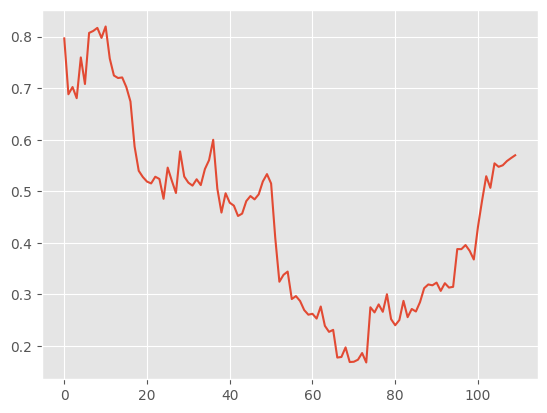

In [11]:
pd.Series(res["rho"]).plot()